# Anotaciones
A veces querremos escribir **notas** en el gráfico o resaltar algún punto de interés con texto.
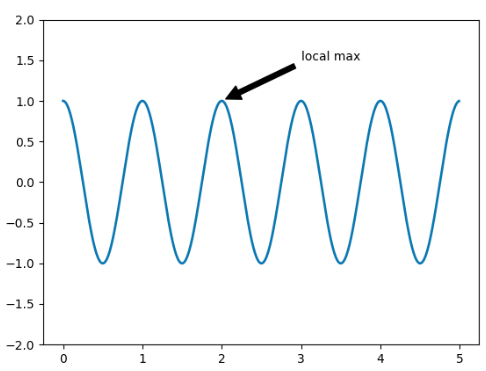

 También es util utilizar **marcas** como líneas verticales u horizontales para resaltar límites o umbrales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('../data/tiendas_procesado.csv', index_col='fecha')
df

,DAIRY,MEATS,SEAFOOD
fecha,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


# Pandas

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

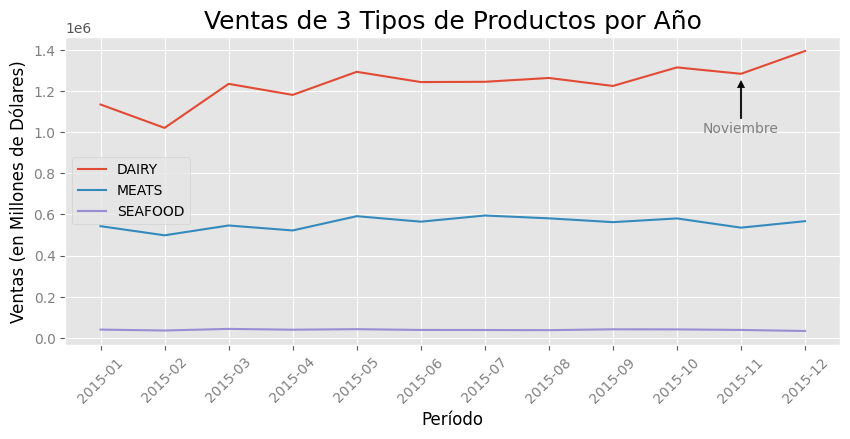

In [3]:
plt.style.use(
    'ggplot' 
)
ax = df.plot.line(
    figsize=(10, 4)
)

ax.set_title(
    'Ventas de 3 Tipos de Productos por Año',
    fontdict={
        'size': 18,
        'name': 'Helvetica'
    }
)

ax.set_xlabel(
    'Período',
    fontdict={
        'name': 'Helvetica',
        'color': 'black',
        'size': 12
    }    
)


ax.set_ylabel(
    'Ventas (en Millones de Dólares)',
    fontdict={
        'name': 'Helvetica',
        'color': 'black',
        'size': 12
    }
)

ax.set_xticks(np.arange(0, len(df))) 
ax.set_xticklabels(
    df.index.values, 
    rotation=45,
    fontdict={
        'color':  'grey',
        'size': 10
    }
)

# Añadir anotaciones
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html
ax.annotate(
    'Noviembre', # El texto
    xy = (10, 1250000), # La ubicación del punto sobre el cual hare mi anotación (x, y). A este punto apuntara mi flecha
    xytext = (10, 1000000), # La ubicacion donde estara mi texto
    size=10, 
    color='grey',
    horizontalalignment='center',
    arrowprops={ 
        'width': 1,
        'color': 'black',
        'headwidth': 5,
        'headlength': 5
    }
)

plt.yticks(
    fontsize=10,
    color='grey',
    name='Helvetica'
)

plt.show()

# Seaborn

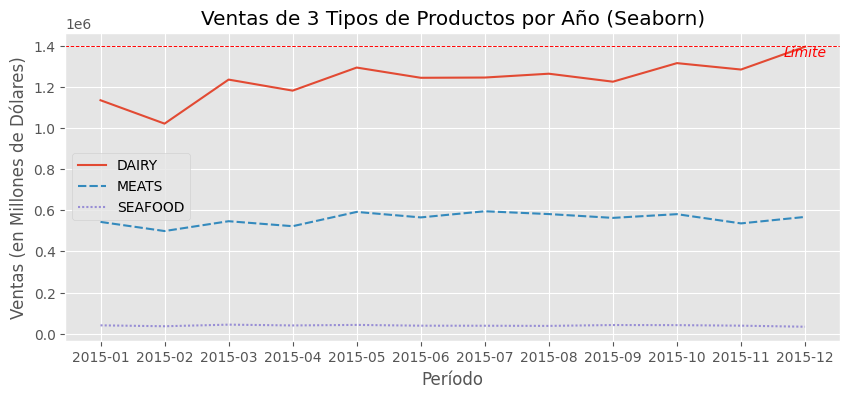

In [4]:
plt.figure(
    figsize=(10, 4)
)

ax = sns.lineplot(
    df
)

ax.set(
    xlabel='Período', 
    ylabel='Ventas (en Millones de Dólares)',
    title='Ventas de 3 Tipos de Productos por Año (Seaborn)'
)

# Marcar una línea en el gráfico
# Lineas horizontales: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html
# Lineas verticales: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html
ax.axhline(
    1400000, # Punto en el Eje Y donde quiero trazar mi linea horizontal
    linestyle='dashed',
    color='red',
    alpha=1,
    linewidth=0.7
)

ax.annotate(
    'Límite', # El texto
    xy = (11, 1400000), # La ubicación del punto sobre el cual hare mi anotación (x, y). A este punto apuntara mi flecha
    xytext = (11, 1400000), # La ubicacion donde estara mi texto
    size=10, 
    color='red',
    horizontalalignment='center',
    verticalalignment='top',
    fontstyle='italic' # https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
)

plt.show()

# Plotly

In [5]:
fig = px.line(
    df,
    width=800, 
    height=500,
    template='ggplot2',
    title='Ventas de 3 Tipos de Productos por Año', 
    labels={
        "fecha": "Periodo",
        "value": "Ventas por año (en millones de $)",
        "variable": "Tipo de Producto"
    }
)

fig.update_layout( 
    font_family="Rockwell",
    font_color="black"
)

fig.update_xaxes(
    tickangle=45,
    tickmode='array',
    tickvals=df.index.values,
    tickfont={
        'color': 'grey',
        'size': 10
    }
)

fig.update_yaxes(
    tickfont={
        'color': 'grey',
        'size': 10
    }
)

fig.update_yaxes(
    nticks=20
)

# Anotaciones en Plotly
# https://plotly.com/python/text-and-annotations/#styling-and-coloring-annotations
fig.add_annotation(
    x='2015-11', # Debido a que este es el valor original
    y=1300000,
    text="Noviembre",
    showarrow=True,
    arrowhead=3, # Tipos de flecha: numero del 0 al 8
    arrowsize=1, # Tamaño de la cabeza de la flecha
    arrowwidth=2, # Ancho de la flecha en pixeles
    arrowcolor="grey",
    opacity=1,
    font={
        'family': "Arial",
        'size': 10,
        'color': "black"
    }
)

# Marcas en Plotly
# https://plotly.com/python/horizontal-vertical-shapes/#adding-text-annotations
fig.add_hline(
    y=1400000, 
    line_dash="dot",
    annotation_text="Límite", # Puedo incluir al mismo tiempo una anotación
    annotation_position="top left", # "top left", "top right", "bottom left", "bottom", "top"
    annotation_font_size=10,
    annotation_font_color="red",
    opacity=0.8,
    line_width=1,
    line_color='red',
)

fig.show()